In [2]:
import warnings
import os
warnings.filterwarnings("ignore") 

# Suppress TensorFlow logging messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")

from akita_utils.logo_utils import (collect_flanked_sequences, 
                                        reorder_by_hamming_dist, 
                                        prepare_nt_count_table, 
                                        plot_seq_matrix,
                                        plot_logo_from_counts)

from helper import read_disruption_smf_data

### Reading SMF and disruption score data

In [2]:
# reading disruption data
data_dir = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption/disruptions_vs_features/"
df_ave = read_disruption_smf_data(data_dir)

# data with the SMF experiment results
binding_frequencies = pd.read_table("/home1/smaruj/akitaX1-analyses/input_data/sonmezer2021_SMF_CTCF_binding_data/binding.frequencies.tsv",sep="\t")

# merging data based on the TFBS_cluster
df = df_ave.merge(binding_frequencies[binding_frequencies["biological.state"] == "Accessible"][["TFBS_cluster", "Freqs"]], on=["TFBS_cluster"], how="left")
df = df.rename(columns={"Freqs": "freq_accessible"})
df = df.merge(binding_frequencies[binding_frequencies["biological.state"] == "Bound"][["TFBS_cluster", "Freqs"]], on=["TFBS_cluster"], how="left")
df = df.rename(columns={"Freqs": "freq_bound"})
df.fillna(0, inplace=True)

### Collecting sequences with top "frequency bound" values

In [3]:
# number of sites
num_sites = 150
sites = df.sort_values(by=["freq_bound"], ascending=False)[:num_sites].reset_index(drop=True)

# collecting sequences
dna_matrix = collect_flanked_sequences(sites)

### Plotting matrix with sequence

/home1/smaruj/akita_utils/akita_utils/logo_utils.py:88: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  scipy.cluster.hierarchy.linkage(seq_dist)


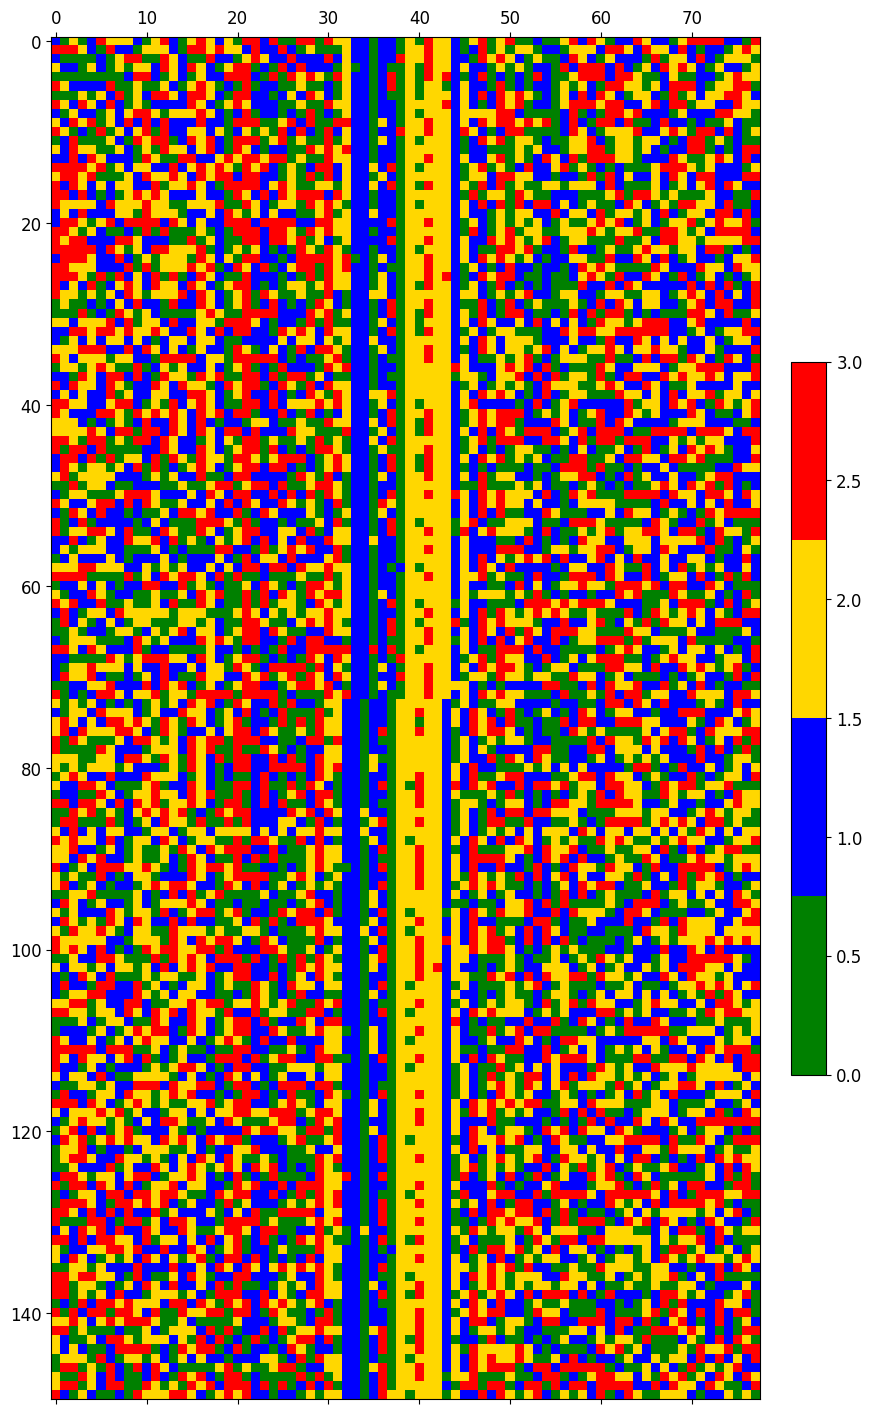

In [4]:
plot_seq_matrix(dna_matrix, cluster_by_hamming=True)

### Logo based on the picked sites

In [5]:
# counting nucleotides at each position
nt_count_table = prepare_nt_count_table(sites)

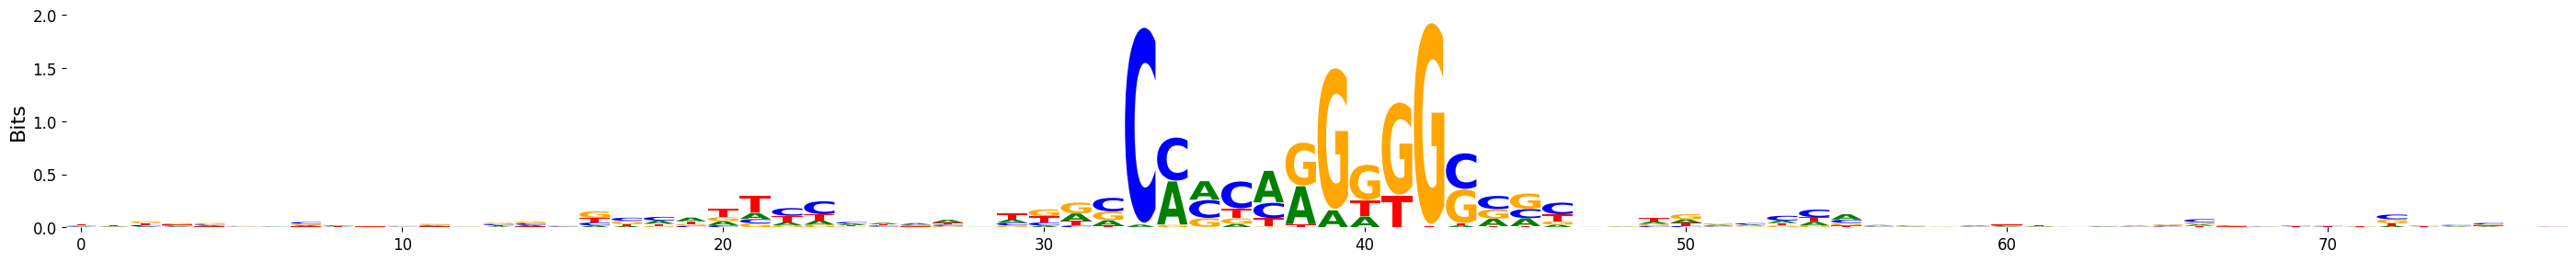

In [6]:
plot_logo_from_counts(nt_count_table)